In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import json
%matplotlib inline

In [4]:
users = pd.read_csv('filled_data.csv', encoding='utf8')
users

,user,text_length,contains_question_mark,contains_exclamation_mark,contains_multiple_question_marks,contains_multiple_exclamation_marks,contains_multiple_dots,contains_happy_emotes,num_of_happy_emotes,contains_sad_emotes,num_of_sad_emotes,fraction_uppercase,Positive_Score,Negative_Score,distribution_excellent,distribution_very_good,distribution_avergae,distribution_poor,distribution_terrible,gender
0,0_yevgeniya_0,586.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.559727,0.998807,0.000000,12.0,3.0,3.0,0.0,0.0,woman
1,125bernardc,1079.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.019462,0.000000,0.995829,48.0,47.0,29.0,7.0,0.0,man
2,129sylviac,624.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.602564,0.000000,0.999486,18.0,13.0,3.0,2.0,0.0,woman
3,130gabbyh,643.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.555210,0.998925,0.000000,15.0,5.0,1.0,0.0,0.0,woman
4,137mariust,803.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.867995,0.998923,0.000000,4.0,0.0,0.0,0.0,0.0,man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4766,Иван С,892.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.672646,0.000000,0.998747,1.0,0.0,3.0,2.0,0.0,man
4767,Надежда Ж,216.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.629630,0.998928,0.000000,23.0,4.0,1.0,0.0,0.0,man
4768,אילן ש,356.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.213483,0.998913,0.000000,2.0,0.0,0.0,0.0,1.0,man
4769,יעקב ח,606.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990099,0.000000,0.999502,79.0,31.0,16.0,2.0,0.0,man


In [5]:
#Ratings

In [7]:
reviews = pd.read_csv('preprocessed_reviews.csv', encoding='utf8')
reviews

,hotel,user,reviewed_date,visit_date,rating,title,text
0,ad Imperial Palace Hotel Thessaloniki,tehgr3g,"March 28, 2022",March 2022,5.0,Excellent Stay in Thessaloniki Center !,"best,value,money,hotel,heart,top,spot,biggest,..."
1,ad Imperial Palace Hotel Thessaloniki,gopalakrishnank769,"December 5, 2021",December 2021,4.0,Good hotel with professional staff,"ad,imperial,palace,hotel,location,almost,perfe..."
2,ad Imperial Palace Hotel Thessaloniki,TasosAnth,"November 17, 2021",November 2021,3.0,Palace only in the lobby,"hotel,near,center,everything,walkable,distance..."
3,ad Imperial Palace Hotel Thessaloniki,ADtrip27,"November 6, 2021",November 2021,3.0,Old-fashioned hotel,"spent,one,night,hotel,ideally,next,restaurant,..."
4,ad Imperial Palace Hotel Thessaloniki,Alex J,"March 17, 2020",April 2019,4.0,A reasonably good hotel,"group,tour,large,group,people,hotel,chosen,tou..."
...,...,...,...,...,...,...,...
14182,Zeus Is Loose Hostel,JenniferS8321,"July 15, 2021",June 2021,5.0,Very nice hostel!!!,"best,hostel,could,imagine,nice,team,organized,..."
14183,Zeus Is Loose Hostel,timlucier,"June 27, 2021",May 2021,5.0,Best Hostel Ever,"hand,hostel,ever,stayed,super,comfortable,room..."
14184,Zeus Is Loose Hostel,Ladikos2,"April 15, 2021",September 2020,5.0,"Amazing location , hospitality and view","great,experience,friend,slept,day,city,staff,s..."
14185,ZH Luxury Suites City Center View,Cristian D,"August 6, 2021",August 2021,3.0,Decent for one night.,"excellent,location,close,store,close,restauran..."


In [8]:
j=-1
i=0
men_1=0
men_2=0
men_3=0
men_4=0
men_5=0

women_1=0
women_2=0
women_3=0
women_4=0
women_5=0

for user1 in users.user:
    j+=1
    i=0
    for user2 in reviews.user:
        if users.gender[j]=='man':
            if user1==user2:
                if reviews.rating[i]==5:
                    men_5 += 1
                elif reviews.rating[i]==4:
                    men_4 += 1
                elif reviews.rating[i]==3:
                    men_3 += 1
                elif reviews.rating[i]==2:
                    men_2 += 1
                else:
                    men_1 += 1
        elif users.gender[j]=='woman':
            if user1==user2:
                if reviews.rating[i]==5:
                    women_5 += 1
                elif reviews.rating[i]==4:
                    women_4 += 1
                elif reviews.rating[i]==3:
                    women_3 += 1
                elif reviews.rating[i]==2:
                    women_2 += 1
                else:
                    women_1 += 1
        i+=1

print('Men 5 star:', men_5)
print('Men 4 star:', men_4)
print('Men 3 star:', men_3)
print('Men 2 star:', men_2)
print('Men 1 star:', men_1)
print('Women 5 star:', women_5)
print('Women 4 star:', women_4)
print('Women 3 star:', women_3)
print('Women 2 star:', women_2)
print('Women 1 star:', women_1)

Men 5 star: 1521
Men 4 star: 1014
Men 3 star: 465
Men 2 star: 179
Men 1 star: 107
Women 5 star: 1293
Women 4 star: 532
Women 3 star: 211
Women 2 star: 79
Women 1 star: 77


In [9]:
#plotting

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


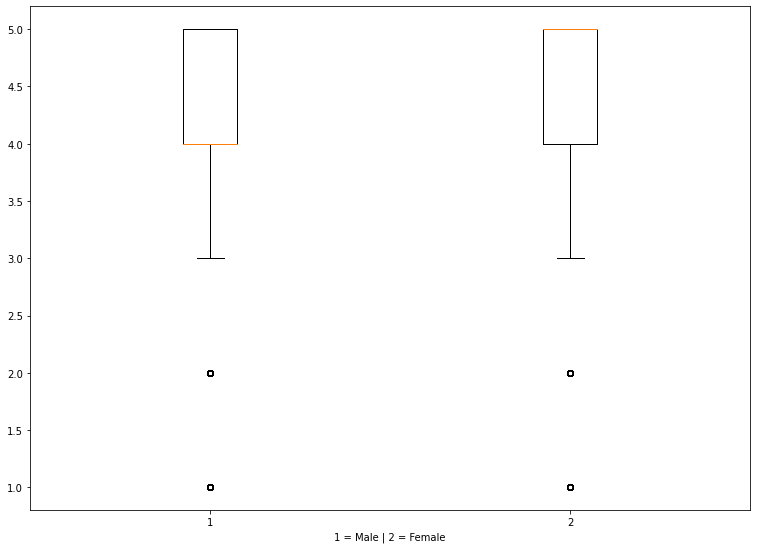

In [10]:
women = []
for i in range (0, women_1,1):
    women.append(1)
for i in range (0, women_2,1):
    women.append(2)
for i in range (0, women_3,1):
    women.append(3)
for i in range (0, women_4,1):
    women.append(4)
for i in range (0, women_5,1):
    women.append(5)
    
men = []
for i in range (0, men_1,1):
    men.append(1)
for i in range (0, men_2,1):
    men.append(2)
for i in range (0, men_3,1):
    men.append(3)
for i in range (0, men_4,1):
    men.append(4)
for i in range (0, men_5,1):
    men.append(5)
    
data = [men, women]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('1 = Male | 2 = Female')
bp = ax.boxplot(data)
plt.show()

In [11]:
#Polarity scores
reviews = pd.read_csv('sentiment_preprocessed_reviews.csv', encoding='utf8')
reviews = reviews.drop(columns=['hotel','reviewed_date', 'visit_date', 'rating', 'title','text', 'preprocessed_text'])
reviews['sentiment'] = reviews['sentiment'].apply(lambda row: json.loads(str(row).replace("\'", "\"")))
reviews['sentiment_label'] = reviews['sentiment'].apply(lambda row: row['label'])
reviews['sentiment_score'] = reviews['sentiment'].apply(lambda row: row['score'])
reviews = reviews.drop(columns=['sentiment'])
reviews

,user,sentiment_label,sentiment_score
0,tehgr3g,POSITIVE,0.998926
1,gopalakrishnank769,POSITIVE,0.998927
2,TasosAnth,NEGATIVE,0.999512
3,ADtrip27,POSITIVE,0.998814
4,Alex J,POSITIVE,0.998877
...,...,...,...
14182,JenniferS8321,POSITIVE,0.998934
14183,timlucier,POSITIVE,0.998935
14184,Ladikos2,POSITIVE,0.998938
14185,Cristian D,POSITIVE,0.998793


In [12]:
j=-1
men_pos=0
men_neg=0

women_pos=0
women_neg=0

for user1 in users.user:
    j+=1
    i=0
    for user2 in reviews.user:
        if users.gender[j]=='man':
            if user1==user2:
                if reviews.sentiment_label[i]=='POSITIVE':
                    men_pos += 1
                else:
                    men_neg += 1
        elif users.gender[j]=='woman':
            if user1==user2:
                if reviews.sentiment_label[i]=='POSITIVE':
                    women_pos += 1
                else:
                    women_neg += 1
        i+=1

print('Men positive reviews:', men_pos)
print('Men negative reviews:', men_neg)
print('Women postive reviews:', women_pos)
print('Women negative reviews:', women_neg)

Men positive reviews: 2786
Men negative reviews: 500
Women postive reviews: 1907
Women negative reviews: 285


In [13]:
#plotting

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


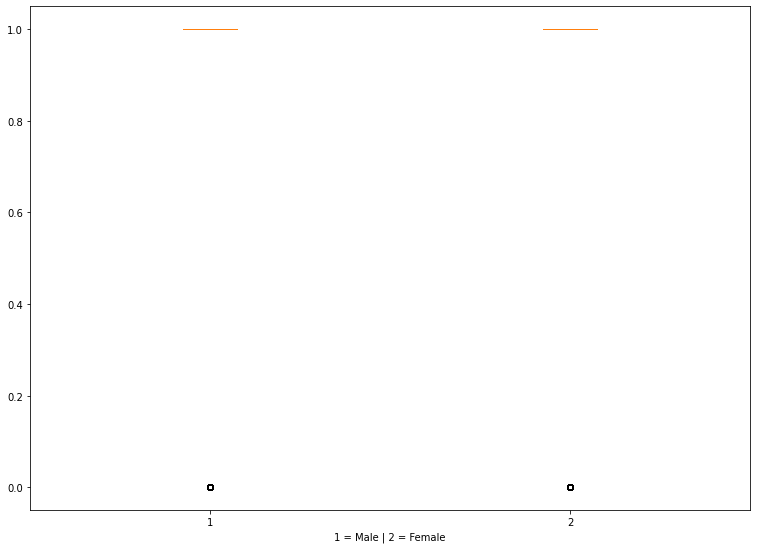

In [14]:
women = []
for i in range (0, women_pos,1):
    women.append(1)
for i in range (0, women_neg,1):
    women.append(0)
    
men = []
for i in range (0, men_pos,1):
    men.append(1)
for i in range (0, men_neg,1):
    men.append(0)
    
data = [men, women]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('1 = Male | 2 = Female')
bp = ax.boxplot(data)
plt.show()

#POSITIVE REVIEWS=1
#NEGATIVE REVIEWS=0